## Observations and Insights 

* More mice were tested with Capomulin in this study than any other drug regimen—Ramicane was a close second. Propriva had the least number of mice tested.
* There were slightly more male mice in this study than female mice.
* When measuring tumor volume, the highest quartile for Capomulin and Ramicane nearly aligns beneath the lowest quartile for Infubinol and Ceftamin. This indicates that final tumor volume in Capomulin and Ramicane is significantly lower than Infubinol and Ceftamin.
* For the Capomulin drug regimen, there is a positive correlation between tumor volume (mm3) and the weight of mice.

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(mouse_df['Mouse ID'].unique())

249

In [4]:
#Checking the number of columns
len(mouse_df['Mouse ID'])

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
drop_mouse_id = mouse_df.loc[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

In [6]:
#Inspect variable
print(drop_mouse_id)

['g989']


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df=mouse_df[mouse_df["Mouse ID"].isin(drop_mouse_id) == False]

In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_df)

1880

In [9]:
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#group by drug regimen data
regimen_df = clean_mouse_df.groupby(['Drug Regimen'])
#summary statistics of tumor volume (mm3)
mean = regimen_df['Tumor Volume (mm3)'].mean()
median = regimen_df['Tumor Volume (mm3)'].median()
variance = regimen_df['Tumor Volume (mm3)'].var()
std_deviation = regimen_df['Tumor Volume (mm3)'].std()
sem_tumor_volume = regimen_df['Tumor Volume (mm3)'].sem()

In [11]:
#summary table
summary = pd.DataFrame({"Mean": mean, "Median":median, "Variance":variance, "Standard Deviation": std_deviation,
                        "SEM": sem_tumor_volume})

summary.head(15)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
#sorted from largest to smallest
mouse_count_grouped = clean_mouse_df.groupby(['Drug Regimen']).count()["Mouse ID"].sort_values(ascending=False)
print(mouse_count_grouped)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Mouse ID, dtype: int64


Text(0, 0.5, 'Number Of Mice')

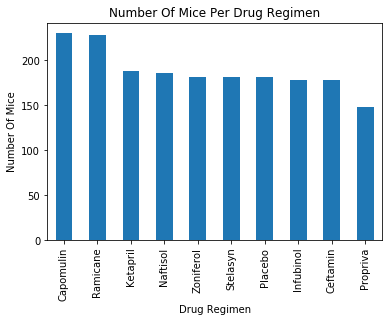

In [13]:
#plot using pandas
pandas_mouse_plot = mouse_count_grouped.plot.bar(title='Number Of Mice Per Drug Regimen')
pandas_mouse_plot.set_ylabel("Number Of Mice")

<BarContainer object of 10 artists>

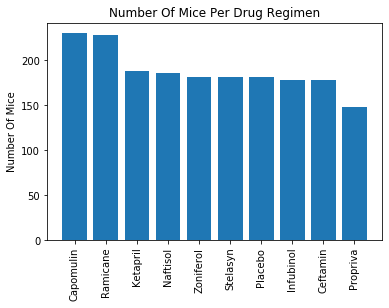

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mouse_count_grouped))
tick_locations = [value for value in x_axis]
plt.title("Number Of Mice Per Drug Regimen")
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril",
                            "Naftisol", "Zoniferol", "Stelasyn",
                            "Placebo", "Infubinol", "Ceftamin",
                            "Propriva"], rotation='vertical')
plt.ylabel("Number Of Mice")
plt.bar(x_axis, mouse_count_grouped)

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#generate dataframe grouped by sex
mouse_sex_df = pd.DataFrame(clean_mouse_df.groupby(["Sex"]).count())

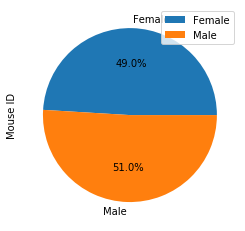

In [16]:
#plot using pandas
plot = mouse_sex_df.plot.pie(y='Mouse ID', autopct="%1.1f%%")

In [17]:
#index reset in this dataframe in order to make below calculations
mouse_sex_reset_index_df = pd.DataFrame(clean_mouse_df.groupby(["Sex"]).count()).reset_index()
#number of female mice
female_mice = mouse_sex_reset_index_df.loc[mouse_sex_reset_index_df['Sex'] == 'Female', 'Mouse ID']
#number of male mice
male_mice = mouse_sex_reset_index_df.loc[mouse_sex_reset_index_df['Sex'] == 'Male', 'Mouse ID']
#total
total = int(female_mice) + int(male_mice)
#percentage of female mice
female_mouse_percentage = int(female_mice) / int(total)
#percentage of male mice
male_mouse_percentage = int(male_mice) / int(total)

([<matplotlib.patches.Wedge at 0x20a5cc31888>,
 [Text(-0.79864235783093, -0.8956396509078041, 'Female'),
  Text(0.7320888280116862, 0.8210030133321533, 'Male')],
 [Text(-0.46587470873470915, -0.5224564630295523, '49.0%'),
  Text(0.39932117891546515, 0.4478198254539018, '51.0%')])

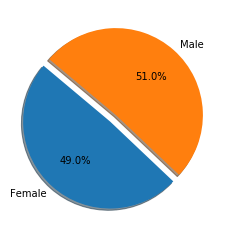

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [female_mouse_percentage, male_mouse_percentage]

# pyplotexplode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Last (greatest) timepoint for each mouse, used to find IQR
last_timepoints = clean_mouse_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
#transform into a dataframe with reset index, used to evaluate final tumor volume by specific regimen
last_timepoints_df = clean_mouse_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)'].reset_index()

In [20]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = last_timepoints.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volumes is: 45.87586684749999
The upper quartile of tumor volumes is: 65.05362410500001
The interquartile range of tumor volumes is: 19.17775725750002
The the median of tumor volumes is: 55.793278175 
Values below 17.109230961249963 could be outliers.
Values above 93.82025999125004 could be outliers.


In [21]:
# List of treatments
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
    
# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin= last_timepoints_df.loc[last_timepoints_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= last_timepoints_df.loc[last_timepoints_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=last_timepoints_df.loc[last_timepoints_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= last_timepoints_df.loc[last_timepoints_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']  

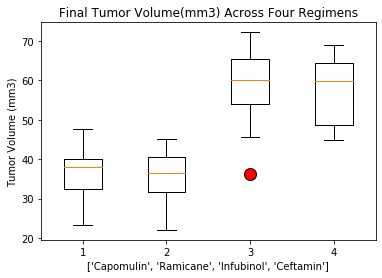

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
format_red = dict(markerfacecolor='red',markersize=12)
regimens = [capomulin, ramicane, infubinol, ceftamin]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume(mm3) Across Four Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel(treatments)
ax1.boxplot(regimens, flierprops=format_red)
plt.show()

## Line and Scatter Plots

In [23]:
#random mouse dataframe created to retrieve random mouse variable without errors
random_mouse_df = clean_mouse_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Timepoint'].reset_index()

In [24]:
# create variable for random mouse
mouse = last_timepoints_df.loc[last_timepoints_df['Drug Regimen'] == 'Capomulin']['Mouse ID']
random_mouse = random.choice(last_timepoints_df.loc[last_timepoints_df['Drug Regimen'] == 'Capomulin']['Mouse ID'])
print(random_mouse)

g316


In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df= clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == 'Capomulin']
random_mouse_plot= capomulin_df.loc[capomulin_df['Mouse ID'] == random_mouse]

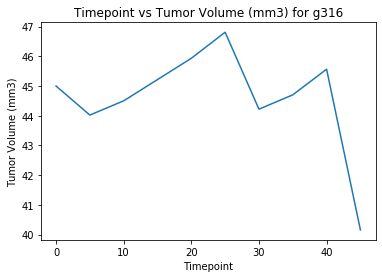

In [26]:
plt.plot(random_mouse_plot["Timepoint"], random_mouse_plot["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3) for " + random_mouse)
plt.show()

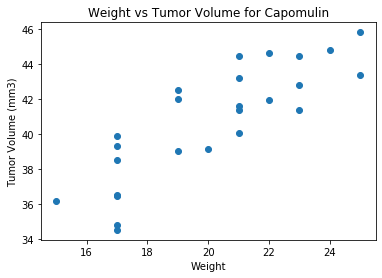

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#grouped by mouse ID so x and y are the same size
average_mouse_weight=capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(average_mouse_weight["Weight (g)"],average_mouse_weight["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

The correlation coefficient between Weight (g) and Tumor Volume (mm3) is 0.84


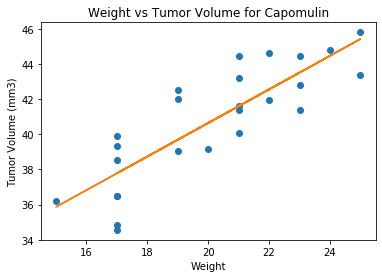

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = average_mouse_weight["Weight (g)"]
y = average_mouse_weight["Tumor Volume (mm3)"]
#correlation coefficient
print(f"The correlation coefficient between Weight (g) and Tumor Volume (mm3) is {round(st.pearsonr(x,y)[0],2)}")
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()